<a href="https://colab.research.google.com/github/katlass/Machine-Learning/blob/main/neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kate Lassiter
Homework 2

### Problem 1 - Perceptron 15 points 
#### Consider a 2-dimensional data set in which all points with x1 > x2 belong to the positive class, and all points with x1 ≤x2 belong to the negative class. Therefore, the true separator of the two classes is linear hyperplane (line) defined by x1 −x2 = 0. Now create a training data set with 20 points randomly generated inside the unit square in the positive quadrant. Label each point depending on whether or not the first coordinate x1 is greater than its second coordinate x2. Now consider the following loss function for training pair (  ̄X,y) and weight vector  ̄W: L = max{0,a −y(  ̄W ·  ̄X)}, where the test instances are predicted as ˆy = sign{ ̄W ·  ̄X}. For this problem,  ̄W = [w1,w2],  ̄X = [x1,x2] and ˆy = sign(w1x1 + w2x2). A value of a = 0 corresponds to the perceptron criterion and a value of a = 1 corresponds to hinge-loss.


#### 1. You need to implement the perceptron algorithm without regularization (don’t use any existing im-plementation of perceptron), train it on the 20 points above, and test its accuracy on 1000 randomly generated points inside the unit square. Generate the test points using the same procedure as the training points. You need to have your own implementation of the perceptron algorithm. (6)

In [ ]:
import numpy as np

In [34]:
np.random.seed(3) 
X_train=np.random.uniform(0, 1, size=(20, 2))
y_train=[1 if X_train[x,0]>X_train[x,1] else 0 for x in range(len(X_train))]
X_test=np.random.uniform(0, 1, size=(1000, 2))
y_test=[1 if X_test[x,0]>X_test[x,1] else 0 for x in range(len(X_test))]


In [35]:
def perceptron(X,y,epochs,learning_rate=0.01,loss_func=None):
    n, d = X.shape     
   # np.random.seed(3) 
    w0 = np.random.uniform(-3, 3, size=(1, d))
    for epoch in range(epochs):
      for i in range(n):
          y_pred =  np.sign(np.matmul(X[i],np.transpose(w0)))
          y_error = y[i] - y_pred
          if loss_func=="hinge":
                  total_loss=np.mean(list(map(lambda x: max(1-x,0),y_pred)))
                  if y_error == 0 and total_loss > 0:
                    w0 = w0 + (learning_rate * y[i] * X[i])
                  else:
                    w0 = w0 + (learning_rate * y_error * X[i])
          else:
            w0 = w0 + (learning_rate * y_error * X[i])
    return(w0)

In [37]:
def evaluate(X,y,w,loss_func=None):
  y_pred=np.sign(np.matmul(X,np.transpose(w)))[:, 0] 
  accuracy=np.mean(np.where(y_pred==y,1,0))
  return(accuracy)

In [38]:
weights=perceptron(X_train,y_train,epochs=100)
print("Accuracy: ",evaluate(X_test,y_test,weights))

Accuracy:  0.538


####2. Change the perceptron criterion to hinge-loss in your implementation for training, and repeat the accuracy computation on the same test points above. Regularization is not used. (5)

In [ ]:
weights2=perceptron(X_train,y_train,epochs=100,loss_func="hinge")
print("Accuracy: ",evaluate(X_test,y_test,weights2))

Accuracy:  0.505


#### 3. In which case do you obtain better accuracy and why? (2)

##### You obtain better accuracy with the hinge-loss rather than the regular loss on this particular dataset. With hinge loss, if a data point is far from the decison boundary, nothing is added to the loss. This can make it less sensitive to overfitting, converge faster, and be more able to generalize depending on what data it is fed.

####4. In which case do you think that the classification of the same 1000 test instances will not change significantly by using a different set of 20 training points? (2)
##### The hinge loss would not change very dramatically in this case, it is because it seeks to find the maximum margin seperation of the classes and doesn't consider points far from the margin, so as long as they followed the same general pattern the hinge loss perceptron would be less afected.

#### 1. Explain vanishing gradients phenomenon using standard normalization with different values of standard deviation and tanh and sigmoid activation functions. 

##### When a network is many layers, the derivative calculated in backpropagation diminishes and results in a near zero partial derivative of the loss function, rendering the network unable to learn, or at least very slowly, and update weights accordingly. This often occurs due to the choice of activation function and weight intialization scheme.

### 2) The dying ReLU is a kind of vanishing gradient, which refers to a problem when ReLU neurons become inactive and only output 0 for any input. In the worst case of dying ReLU, ReLU neurons at a certain layer are all dead, i.e., the entire network dies and is referred as the dying ReLU neural networks in Lu et al (reference below). A dying ReLU neural network collapses to a constant function. Show this phenomenon using any one of the three 1-dimensional functions in page 11 of Lu et al. Use a 10-layer ReLU network with width 2 (hidden units per layer). Use minibatch of 64 and draw training data uniformly from  Perform 1000 independent training simulations each with 3,000 training points. Out of these 1000 simulations, what fraction resulted in neural network collapse. Is your answer close to over 90% as was reported in Lu et al. ?

In [39]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD

In [40]:
X_train = np.random.uniform(-np.sqrt(7),np.sqrt(7),3000).reshape(-1,1)
y_train = abs(X_train.reshape(-1,1))
X_test = np.random.uniform(-np.sqrt(7),np.sqrt(7),500).reshape(-1,1)
y_test = abs(X_test.reshape(-1,1))

In [41]:
model = Sequential([
  Dense(2, input_dim=1,activation="relu"),
  Dense(2, activation="relu"),
  Dense(2, activation="relu"),
  Dense(2, activation="relu"),
  Dense(2, activation="relu"),
  Dense(2, activation="relu"),
  Dense(2, activation="relu"),
  Dense(2, activation="relu"),
  Dense(2, activation="relu"),
  Dense(2, activation="relu"),
  Dense(1)
  ])

model.summary()
opt=SGD(learning_rate=0.01, momentum=0.9 ,nesterov=True, name="SGD")
model.compile(loss="mean_squared_error", optimizer=opt)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 2)                 4         
                                                                 
 dense_40 (Dense)            (None, 2)                 6         
                                                                 
 dense_41 (Dense)            (None, 2)                 6         
                                                                 
 dense_42 (Dense)            (None, 2)                 6         
                                                                 
 dense_43 (Dense)            (None, 2)                 6         
                                                                 
 dense_44 (Dense)            (None, 2)                 6         
                                                                 
 dense_45 (Dense)            (None, 2)               

In [45]:
def simulation(model_1,X,y,X_val,y_val,n):
  collapse =0
  for x in range(n):
    history = model_1.fit(X,y, epochs=2, batch_size=64, validation_data=(X_val, y_val))
    y_pred = model_1.predict(X_val)
    if np.var(y_pred) <= 10e-4:
      collapse = collapse + 1
  return(collapse/n)

In [46]:
collapsed=simulation(model,X_train,y_train,X_test, y_test,n=1000)
print("Fraction of collapsed networks: ",collapsed)

Streaming output truncated to the last 5000 lines.
47/47 [==============================] - 0s 5ms/step - loss: 0.5769 - val_loss: 0.5930
Epoch 2/2
16/16 [==============================] - 0s 2ms/step
Epoch 1/2
47/47 [==============================] - 0s 4ms/step - loss: 0.5766 - val_loss: 0.5933
Epoch 2/2
16/16 [==============================] - 0s 2ms/step
Epoch 1/2
47/47 [==============================] - 0s 4ms/step - loss: 0.5765 - val_loss: 0.5924
Epoch 2/2
16/16 [==============================] - 0s 2ms/step
Epoch 1/2
47/47 [==============================] - 0s 5ms/step - loss: 0.5773 - val_loss: 0.5939
Epoch 2/2
16/16 [==============================] - 0s 2ms/step
Epoch 1/2
47/47 [==============================] - 0s 6ms/step - loss: 0.5774 - val_loss: 0.5925
Epoch 2/2
16/16 [==============================] - 0s 2ms/step
Epoch 1/2
47/47 [==============================] - 0s 4ms/step - loss: 0.5768 - val_loss: 0.5925
Epoch 2/2
16/16 [==============================] - 0s 2ms/step

##### The rate of collapsed networks is very high, actually 100% of the networks in my case, similar to what was shown in Lu et al.

#### 3. Instead of ReLU consider Leaky ReLU activation as defined below:Run the 1000 training simulations in part 2 with Leaky ReLU activation and keeping everything else same. Again calculate the fraction of simulations that resulted in neural network collapse. Did Leaky ReLU help in preventing dying neurons ? (10)

In [47]:
model = Sequential([
  Dense(2, input_dim=1,activation="leaky_relu"),
  Dense(2, activation="leaky_relu"),
  Dense(2, activation="leaky_relu"),
  Dense(2, activation="leaky_relu"),
  Dense(2, activation="leaky_relu"),
  Dense(2, activation="leaky_relu"),
  Dense(2, activation="leaky_relu"),
  Dense(2, activation="leaky_relu"),
  Dense(2, activation="leaky_relu"),
  Dense(2, activation="leaky_relu"),
  Dense(1)
  ])

model.summary()
opt=SGD(learning_rate=0.01, momentum=0.9 ,nesterov=True, name="SGD")
model.compile(loss="mean_squared_error", optimizer=opt)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 2)                 4         
                                                                 
 dense_51 (Dense)            (None, 2)                 6         
                                                                 
 dense_52 (Dense)            (None, 2)                 6         
                                                                 
 dense_53 (Dense)            (None, 2)                 6         
                                                                 
 dense_54 (Dense)            (None, 2)                 6         
                                                                 
 dense_55 (Dense)            (None, 2)                 6         
                                                                 
 dense_56 (Dense)            (None, 2)               

In [48]:
collapsed=simulation(model,X_train,y_train,X_test, y_test,n=1000)
print("Fraction of collapsed networks: ",collapsed)

Streaming output truncated to the last 5000 lines.
47/47 [==============================] - 1s 8ms/step - loss: 0.7213 - val_loss: 0.5913
Epoch 2/2
16/16 [==============================] - 0s 2ms/step
Epoch 1/2
47/47 [==============================] - 0s 4ms/step - loss: 0.5723 - val_loss: 0.5880
Epoch 2/2
16/16 [==============================] - 0s 2ms/step
Epoch 1/2
47/47 [==============================] - 0s 4ms/step - loss: 0.5652 - val_loss: 0.5804
Epoch 2/2
16/16 [==============================] - 0s 2ms/step
Epoch 1/2
47/47 [==============================] - 0s 4ms/step - loss: 0.5290 - val_loss: 0.5364
Epoch 2/2
16/16 [==============================] - 0s 2ms/step
Epoch 1/2
47/47 [==============================] - 0s 4ms/step - loss: 0.4261 - val_loss: 0.4669
Epoch 2/2
16/16 [==============================] - 0s 2ms/step
Epoch 1/2
47/47 [==============================] - 0s 4ms/step - loss: 0.3953 - val_loss: 0.4490
Epoch 2/2
16/16 [==============================] - 0s 2ms/step

##### It seems in this case utilizing LeakyReLU allowed for a very small portion of the networks to collapse, much less than with reLU. 

## Problem 3 - Batch Normalization, Dropout, MNIST 25 points
#### Batch normalization and Dropout are used as effective regularization techniques. However its not clear which one should be preferred and whether their benefits add up when used in conjunction. In this problem we will compare batch normalization, dropout, and their conjunction using MNIST and LeNet-5 (see e.g.,http://yann.lecun.com/exdb/lenet/). LeNet-5 is one of the earliest convolutional neural network developedfor image classification and its implementation in all major framework is available. You can refer to Lecture 3 slides for definition of standardization and batch normalization.

#### 1. Explain the terms co-adaptation and internal covariance-shift. Use examples if needed. You may need o refer to two papers mentioned below to answer this question. (5)

#####Co-adaptation occurs when hidden units don't learn relavent information on their own, they rely on another hidden units to detect features. This can have a negative impact on the model's ability to generalize and on the efficiency of the network. Regularization is one option in handling co-adaptation. Internal covariance-shift occurs when the distribution of each layers input changes due to the changing parameters of the layer before it. Batch normalization is one technique to reduce this problem by keeping the hidden layers' distributions stable during training.

####2. Batch normalization is traditionally used in hidden layers, for input layer standard normalization is used. In standard normalization the mean and standard deviation are calculated using the entire training dataset whereas in batch normalization these statistics are calculated for each mini-batch. Train LeNet-5 with standard normalization of input and batch normalization for hidden layers. What are the learned batch norm parameters for each layer ? (5)

In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import LayerNormalization
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.layers import Input
from tensorflow.random import set_seed
from tensorflow.keras.layers import Dropout
from keras.datasets import mnist

In [49]:
#load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train/255
X_test = X_test/255

11490434/11490434 [==============================] - 0s 0us/step


In [50]:
#LENet 5 architechture reference
#https://thecleverprogrammer.com/2020/11/05/cnn-architectures-in-machine-learning/https://thecleverprogrammer.com/2020/11/05/cnn-architectures-in-machine-learning/
model = Sequential([
        #c1
        Conv2D(filters=6, kernel_size=(5, 5),padding='same', activation='tanh', input_shape=(28,28,1)),
        BatchNormalization(trainable=True),
        #S2
        AveragePooling2D(strides=(2, 2)),
        #C3
        Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'),
        BatchNormalization(trainable=True),
        #S4
        AveragePooling2D(strides=(2, 2)),
        #c5
        Conv2D(filters=120, kernel_size=(5, 5), activation='tanh'),
        BatchNormalization(trainable=True),
        Flatten(),
        #F6
        Dense(units=84, activation='tanh'),
        BatchNormalization(trainable=True),
        #out
        Dense(units=10, activation='softmax')
  ])


# Compile the model
model.compile(loss=categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])

history = model.fit(x=X_train,y=y_train, epochs=5, batch_size=100, validation_data=(X_test, y_test), verbose=1)

accuracy = model.evaluate(X_test, y_test)
print('Accuracy',accuracy[1] * 100)


Epoch 1/5
600/600 [==============================] - 54s 88ms/step - loss: 0.2855 - accuracy: 0.9192 - val_loss: 0.1577 - val_accuracy: 0.9586
Epoch 2/5
600/600 [==============================] - 52s 87ms/step - loss: 0.1329 - accuracy: 0.9625 - val_loss: 0.0948 - val_accuracy: 0.9719
Epoch 3/5
600/600 [==============================] - 63s 105ms/step - loss: 0.0934 - accuracy: 0.9736 - val_loss: 0.0722 - val_accuracy: 0.9804
Epoch 4/5
600/600 [==============================] - 58s 97ms/step - loss: 0.0742 - accuracy: 0.9789 - val_loss: 0.0617 - val_accuracy: 0.9812
Epoch 5/5
313/313 [==============================] - 4s 13ms/step - loss: 0.0580 - accuracy: 0.9833
Accuracy 98.3299970626831


##### Batch norms:

In [54]:
layer_names=['batch_normalization_19','batch_normalization_20','batch_normalization_21','batch_normalization_22']
vars=[]
means=[]
for x in layer_names:
    print("Layer: ",x,"\n",model.get_layer(x).weights)

Layer:  batch_normalization_19 
 [<tf.Variable 'batch_normalization_19/gamma:0' shape=(6,) dtype=float32, numpy=
array([1.1195352, 1.0580572, 1.0993485, 1.1289771, 1.1615837, 1.070019 ],
      dtype=float32)>, <tf.Variable 'batch_normalization_19/beta:0' shape=(6,) dtype=float32, numpy=
array([0.06508961, 0.13205144, 0.01127954, 0.00446395, 0.01734397,
       0.01076172], dtype=float32)>, <tf.Variable 'batch_normalization_19/moving_mean:0' shape=(6,) dtype=float32, numpy=
array([0.20448017, 0.2010934 , 0.01386373, 0.07267049, 0.12280514,
       0.09489987], dtype=float32)>, <tf.Variable 'batch_normalization_19/moving_variance:0' shape=(6,) dtype=float32, numpy=
array([0.07575592, 0.06515887, 0.01449989, 0.02586179, 0.03977934,
       0.01982044], dtype=float32)>]
Layer:  batch_normalization_20 
 [<tf.Variable 'batch_normalization_20/gamma:0' shape=(16,) dtype=float32, numpy=
array([1.0300539 , 1.0183947 , 0.9956134 , 1.0130416 , 0.9905343 ,
       1.0317551 , 1.0354093 , 1.0222303 , 1.

####3. Next instead of standard normalization use batch normalization for input layer also and train the network. Plot the distribution of learned batch norm parameters for each layer (including input) using violin plots. Compare the train/test accuracy and loss for the two cases ? Did batch normalization for input layer improve performance ? (5)

In [55]:
  #LENet 5 architechture reference
  #https://thecleverprogrammer.com/2020/11/05/cnn-architectures-in-machine-learning/https://thecleverprogrammer.com/2020/11/05/cnn-architectures-in-machine-learning/

model = Sequential([
        Input(shape=(28,28,1)),
        BatchNormalization(trainable=True),
        #c1
        Conv2D(filters=6, kernel_size=(5, 5),padding='same', activation='tanh'),#, input_shape=(28,28,1)),
        BatchNormalization(trainable=True),
        #S2
        AveragePooling2D(strides=(2, 2)),
        #C3
        Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'),
        BatchNormalization(trainable=True),
        #S4
        AveragePooling2D(strides=(2, 2)),
        #c5
        Conv2D(filters=120, kernel_size=(5, 5), activation='tanh'),
        BatchNormalization(trainable=True),
        Flatten(),
        #F6
        Dense(units=84, activation='tanh'),
        BatchNormalization(trainable=True),
        #out
        Dense(units=10, activation='softmax')
  ])


# Compile the model
model.compile(loss=categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])

history = model.fit(x=X_train,y=y_train, epochs=5, batch_size=100, validation_data=(X_test, y_test), verbose=1)

accuracy = model.evaluate(X_test, y_test)
print('Accuracy',accuracy[1] * 100)

Epoch 1/5
600/600 [==============================] - 60s 98ms/step - loss: 0.2539 - accuracy: 0.9292 - val_loss: 0.1248 - val_accuracy: 0.9642
Epoch 2/5
600/600 [==============================] - 58s 97ms/step - loss: 0.1023 - accuracy: 0.9726 - val_loss: 0.0749 - val_accuracy: 0.9783
Epoch 3/5
600/600 [==============================] - 58s 97ms/step - loss: 0.0733 - accuracy: 0.9801 - val_loss: 0.0579 - val_accuracy: 0.9825
Epoch 4/5
600/600 [==============================] - 56s 93ms/step - loss: 0.0597 - accuracy: 0.9838 - val_loss: 0.0517 - val_accuracy: 0.9852
Epoch 5/5
313/313 [==============================] - 5s 17ms/step - loss: 0.0474 - accuracy: 0.9871
Accuracy 98.71000051498413


The training and testing accuracy and loss are better for the network with batch normalization on the input layer. 

#### 4. Train the network without batch normalization but this time use dropout. For hidden layers use dropout probability of 0.5 and for input layer take it to be 0.2 Compare test accuracy using dropout to test accuracy obtained using batch normalization in part 2 and 3. (5)

In [56]:
  #LENet 5 architechture reference
  #https://thecleverprogrammer.com/2020/11/05/cnn-architectures-in-machine-learning/https://thecleverprogrammer.com/2020/11/05/cnn-architectures-in-machine-learning/

model = Sequential([
        Input(shape=(28,28,1)),
        Dropout(0.2),
        #c1
        Conv2D(filters=6, kernel_size=(5, 5),padding='same', activation='tanh'),
        Dropout(0.5),
        #S2
        AveragePooling2D(strides=(2, 2)),
        #C3
        Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'),
        Dropout(0.5),
        #S4
        AveragePooling2D(strides=(2, 2)),
        #c5
        Conv2D(filters=120, kernel_size=(5, 5), activation='tanh'),
        Dropout(0.5),
        Flatten(),
        #F6
        Dense(units=84, activation='tanh'),
        Dropout(0.5),
        #out
        Dense(units=10, activation='softmax')
  ])


# Compile the model
model.compile(loss=categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])

history = model.fit(x=X_train,y=y_train, epochs=5, batch_size=100, validation_data=(X_test, y_test), verbose=1)

accuracy = model.evaluate(X_test, y_test)
print('Accuracy',accuracy[1] * 100)

Epoch 1/5
600/600 [==============================] - 44s 72ms/step - loss: 1.4186 - accuracy: 0.5651 - val_loss: 0.5374 - val_accuracy: 0.8699
Epoch 2/5
600/600 [==============================] - 48s 80ms/step - loss: 0.7145 - accuracy: 0.7775 - val_loss: 0.3770 - val_accuracy: 0.8965
Epoch 3/5
600/600 [==============================] - 44s 73ms/step - loss: 0.6049 - accuracy: 0.8103 - val_loss: 0.3252 - val_accuracy: 0.9081
Epoch 4/5
600/600 [==============================] - 42s 71ms/step - loss: 0.5484 - accuracy: 0.8293 - val_loss: 0.2984 - val_accuracy: 0.9120
Epoch 5/5
313/313 [==============================] - 4s 11ms/step - loss: 0.2790 - accuracy: 0.9189
Accuracy 91.89000129699707


The network with only dropout performs worse than those with batch normalization, having a lower accuracy and higher loss.

#### 5. Now train the network using both batch normalization and dropout. How does the performance (test accuracy) of the network compare with the cases with dropout alone and with batch normalization alone ? (5)

In [57]:
  #LENet 5 architechture reference
  #https://thecleverprogrammer.com/2020/11/05/cnn-architectures-in-machine-learning/https://thecleverprogrammer.com/2020/11/05/cnn-architectures-in-machine-learning/

model = Sequential([
        Input(shape=(28,28,1)),
        Dropout(0.2),
        BatchNormalization(trainable=True),
        #c1
        Conv2D(filters=6, kernel_size=(5, 5),padding='same', activation='tanh'),#, input_shape=(28,28,1)),
        Dropout(0.5),
        BatchNormalization(trainable=True),
        #S2
        AveragePooling2D(strides=(2, 2)),
        #C3
        Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'),
        Dropout(0.5),
        BatchNormalization(trainable=True),
        #S4
        AveragePooling2D(strides=(2, 2)),
        #c5
        Conv2D(filters=120, kernel_size=(5, 5), activation='tanh'),
        Dropout(0.5),
        BatchNormalization(trainable=True),
        Flatten(),
        #F6
        Dense(units=84, activation='tanh'),
        Dropout(0.5),
        BatchNormalization(trainable=True),
        #out
        Dense(units=10, activation='softmax')
  ])


# Compile the model
model.compile(loss=categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])

history = model.fit(x=X_train,y=y_train, epochs=5, batch_size=100, validation_data=(X_test, y_test), verbose=1)

accuracy = model.evaluate(X_test, y_test)
print('Accuracy',accuracy[1] * 100)

Epoch 1/5
600/600 [==============================] - 62s 102ms/step - loss: 0.9527 - accuracy: 0.6902 - val_loss: 0.3210 - val_accuracy: 0.9023
Epoch 2/5
600/600 [==============================] - 62s 104ms/step - loss: 0.5990 - accuracy: 0.8129 - val_loss: 0.2554 - val_accuracy: 0.9231
Epoch 3/5
600/600 [==============================] - 62s 103ms/step - loss: 0.4893 - accuracy: 0.8503 - val_loss: 0.2046 - val_accuracy: 0.9353
Epoch 4/5
600/600 [==============================] - 62s 103ms/step - loss: 0.4188 - accuracy: 0.8726 - val_loss: 0.1592 - val_accuracy: 0.9498
Epoch 5/5
313/313 [==============================] - 4s 13ms/step - loss: 0.1341 - accuracy: 0.9574
Accuracy 95.74000239372253


The accuracy and loss of this network are better than applying only dropout to a network, but it is still outperformed by the use of batch normalization alone. With dropout, training is much slower but generalization is better. But considering the network was only trained for 5 epochs, it is the worse model than batch normalization only.

###Problem 4 - Universal Approximators: Depth Vs. Width 30 points Multilayer layer feedforward network, with as little as two layers and sufficiently large hidden units can approximate any arbitrary function. Thus one can tradeoff between deep and shallow networks for the same problem. In this problem we will study this tradeoff using the Eggholder function. Let y(x1,x2) = f(x1,x2) + N(0,0.3) be the function that we want to learn from a neural network through regression with −512 ≤ x1 ≤ 512 and −512 ≤ x2 ≤ 512. Draw a dataset of 100K points from this function (uniformly sampling in the range of x1 and x2) and do a 80/20 training/test split

####1. Assume that total budget for number of hidden units we can have in the network is 512. Train a 1, 2, and 3 hidden layers feedforward neural network to learn the regression function. For each neural network you can consider a different number of hidden units per hidden layer so that the total number of hidden units does not exceed 512. We would recommend to work with 16, 32, 64, 128, 256, 512, hidden units per layer. So if there is only one hidden layer you can have at most 512 units in that layer. If there are two hidden layers, you can have any combination of hidden units in each layer, e.g., 16 and 256, 64 and 128, etc. such that the total is less than 512. Plot the RMSE (Root Mean Square Error) on test set for networks with different number of hidden layers as a function of total number of hidden units. If there are more than one network with the same number of hidden units (say a two hidden layer with 16 in first layer and 128 in second layer and another network with 128 in first layer and 16 in second) you will use the average RMSE. So you will have a figure with three curves, one each for 1, 2, and 3 layer networks, with x-axis being the total number of hidden units. Also plot another curve but with the x-axis being the number of parameters (weights) that you need to learn in the network. (20)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import SGD
from timeit import default_timer as timer
from tensorflow.keras.callbacks import Callback

In [58]:
def my_equation(x1,x2):
    result= -((x2+47)*np.sin(np.sqrt(abs((x1/2)+(x2+47)))))-(x1*np.sin(np.sqrt(abs(x1-(x2+47)))))
    return(result+np.random.normal(0, 0.3, 1))

In [ ]:
np.random.seed(0) # seed random number generator
X= np.random.uniform(low=-512, high=512, size=[100000,2])
y=np.array(list(map(lambda x: my_equation(X[x,0],X[x,1]),range(len(X)) )))
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)


In [ ]:
#time the training
class TimingCallback(Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

cb = TimingCallback()

In [ ]:
opt=SGD(learning_rate=0.01, momentum=0.9 ,nesterov=True, name="SGD")

In [9]:
#training one layer w/ different # hidden units
histories=[]
mse_s=[]
params=[]
times=[]
for x in [16,32,64,128,256,400]:
  print("x  ",x)
  model = Sequential([
  Dense(x, input_dim=2,activation="relu"),
  Dense(1)
  ])
  params_count=model.count_params()
  params=params+[params_count]
  model.summary()
  model.compile(loss="mean_squared_error", optimizer=opt)
  history = model.fit(X_train_scaled, y_train_scaled, epochs=2000,batch_size=1000, callbacks=[cb])
  time=sum(cb.logs)
  times=times+[time]
  histories=histories+[history]
  mse_test = model.evaluate(X_test_scaled, y_test_scaled)
  mse_s=mse_s+[mse_test]


#training two layers w/ different # hidden units
hidden_layer_combos=np.array([[128, 16],[32,16],[256,128],[16, 16],[128,32]])
histories_2=[]
mse_s_2=[]
params_2=[]
times_2=[]
for x in hidden_layer_combos:
  print("x  ",x)
  model = Sequential([
  Dense(x[0], input_dim=2,activation="relu"),
  BatchNormalization(trainable=True),
  Dense(x[1], activation="relu"),
  BatchNormalization(trainable=True),
  Dense(1)
  ])
  params_count=model.count_params()
  params_2=params_2+[params_count]
  model.summary()
  model.compile(loss="mean_squared_error", optimizer=opt)
  history = model.fit(X_train_scaled, y_train_scaled, epochs=2000,batch_size=1000, callbacks=[cb])
  time=sum(cb.logs)
  times_2=times_2+[time]
  histories_2=histories_2+[history]
  mse_test = model.evaluate(X_test_scaled, y_test_scaled)
  mse_s_2=mse_s_2+[mse_test]

Streaming output truncated to the last 5000 lines.
80/80 [==============================] - 0s 5ms/step - loss: 0.2485
Epoch 1514/2000
80/80 [==============================] - 0s 4ms/step - loss: 0.2642
Epoch 1515/2000
80/80 [==============================] - 0s 4ms/step - loss: 0.2554
Epoch 1516/2000
80/80 [==============================] - 0s 5ms/step - loss: 0.2537
Epoch 1517/2000
80/80 [==============================] - 0s 4ms/step - loss: 0.2603
Epoch 1518/2000
80/80 [==============================] - 0s 5ms/step - loss: 0.2563
Epoch 1519/2000
80/80 [==============================] - 0s 5ms/step - loss: 0.2579
Epoch 1520/2000
80/80 [==============================] - 0s 5ms/step - loss: 0.2567
Epoch 1521/2000
80/80 [==============================] - 0s 5ms/step - loss: 0.2628
Epoch 1522/2000
80/80 [==============================] - 0s 5ms/step - loss: 0.2507
Epoch 1523/2000
80/80 [==============================] - 0s 5ms/step - loss: 0.2566
Epoch 1524/2000
80/80 [==================

In [28]:
#get total number hidden units in each layer
num_hidden_2=[]
for x in np.array([[128, 16],[32,16],[256,128],[16, 16],[128,32]]):
  num_hidden_2=num_hidden_2+[sum(x)]

In [29]:
#sort by x-axis ascending
sort_num_hidden, sort_mse_num_hidden = (list(t) for t in zip(*sorted(zip(num_hidden_2, mse_s_2))))
sort_params_mse, sort_mse = (list(t) for t in zip(*sorted(zip(params_2, mse_s_2))))
sort_params_time, sort_times = (list(t) for t in zip(*sorted(zip(params_2, times_2))))

In [20]:
#training three layers w/ different # hidden units
hidden_layer_combos3=np.array([[128, 16,16],[32,16,32],[128,128,64]]) #,[128,32,16]
histories_3=[]
mse_s_3=[]
params_3=[]
times_3=[]
for x in hidden_layer_combos3:
  print("x  ",x)
  model = Sequential([
  Dense(x[0], input_dim=2,activation="relu"),
  BatchNormalization(trainable=True),
  Dense(x[1], activation="relu"),
  BatchNormalization(trainable=True),
  Dense(x[2], activation="relu"),
  BatchNormalization(trainable=True),
  Dense(1)
  ])
  params_count=model.count_params()
  params_3=params_3+[params_count]
  model.summary()
  model.compile(loss="mean_squared_error", optimizer=opt)
  history = model.fit(X_train_scaled, y_train_scaled, epochs=2000,batch_size=1000, callbacks=[cb])
  time=sum(cb.logs)
  times_3=times_3+[time]
  histories_3=histories_3+[history]
  mse_test = model.evaluate(X_test_scaled, y_test_scaled)
  mse_s_3=mse_s_3+[mse_test]

Streaming output truncated to the last 5000 lines.
Epoch 1516/2000
80/80 [==============================] - 1s 6ms/step - loss: 0.0822
Epoch 1517/2000
80/80 [==============================] - 1s 6ms/step - loss: 0.0847
Epoch 1518/2000
80/80 [==============================] - 1s 7ms/step - loss: 0.0841
Epoch 1519/2000
80/80 [==============================] - 0s 6ms/step - loss: 0.0820
Epoch 1520/2000
80/80 [==============================] - 0s 6ms/step - loss: 0.0831
Epoch 1521/2000
80/80 [==============================] - 0s 6ms/step - loss: 0.0855
Epoch 1522/2000
80/80 [==============================] - 1s 6ms/step - loss: 0.0823
Epoch 1523/2000
80/80 [==============================] - 1s 7ms/step - loss: 0.0836
Epoch 1524/2000
80/80 [==============================] - 1s 6ms/step - loss: 0.0815
Epoch 1525/2000
80/80 [==============================] - 1s 6ms/step - loss: 0.0842
Epoch 1526/2000
80/80 [==============================] - 1s 6ms/step - loss: 0.0849
Epoch 1527/2000
80/80 [==

In [26]:
hidden_layer_combos3=np.array([[128, 16,16],[32,16,32],[128,128,64]])
num_hidden_3=[]
for x in hidden_layer_combos3:
  num_hidden_3=num_hidden_3+[sum(x)]

In [27]:
#sort by x-axis ascending
sort_num_hidden3, sort_mse_num_hidden3 = (list(t) for t in zip(*sorted(zip(num_hidden_3, mse_s_3))))
sort_params_mse3, sort_mse3 = (list(t) for t in zip(*sorted(zip(params_3, mse_s_3))))
sort_params_time3, sort_times3 = (list(t) for t in zip(*sorted(zip(params_3, times_3))))

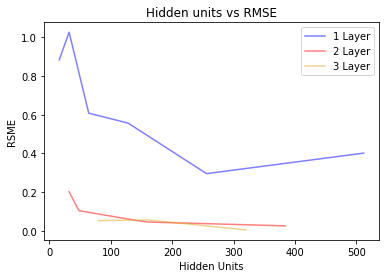

In [31]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.plot( [16,32,64,128,256,512],mse_s ,  c="blue", label='1 Layer',alpha=0.5)
plt.plot( sort_num_hidden,sort_mse_num_hidden ,  c="red", label='2 Layer',alpha=0.5)
plt.plot( sort_num_hidden3,sort_mse_num_hidden3 ,  c="goldenrod", label='3 Layer',alpha=0.5)
plt.legend()
plt.title('Hidden units vs RMSE')
plt.xlabel("Hidden Units")
plt.ylabel("RSME")
plt.show()

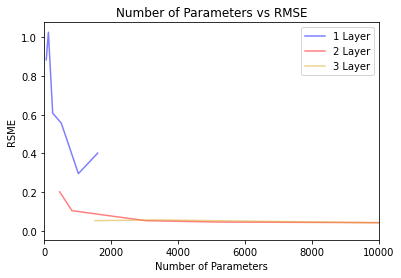

In [32]:
fig, ax = plt.subplots()
plt.plot( params,mse_s ,  c="blue", label='1 Layer',alpha=0.5)
plt.plot( sort_params_mse,sort_mse ,  c="red", label='2 Layer',alpha=0.5)
plt.plot( sort_params_mse3,sort_mse3 ,  c="goldenrod", label='3 Layer',alpha=0.5)
plt.legend()
plt.xlim(0,10000)
plt.title('Number of Parameters vs RMSE')
plt.xlabel("Number of Parameters")
plt.ylabel("RSME")
plt.show()

####2. Comment on the tradeoff between number of parameters and RMSE as you go from deeper (3 hidden layers) to shallow networks (1 hidden layer). Also measure the wall clock time for training each config-uration and plot training time vs number of parameters. Do you see a similar tradeoff in training time? (10)

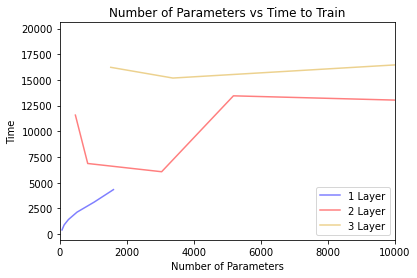

In [33]:
fig, ax = plt.subplots()
plt.plot( params,times ,  c="blue", label='1 Layer',alpha=0.5)
plt.plot( sort_params_time,sort_times ,  c="red", label='2 Layer',alpha=0.5)
plt.plot( sort_params_time3,sort_times3 ,  c="goldenrod", label='3 Layer',alpha=0.5)
plt.legend()
plt.xlim(0,10000)
plt.title('Number of Parameters vs Time to Train')
plt.xlabel("Number of Parameters")
plt.ylabel("Time")
plt.show()

The deeper the network becomes, the longer it takes to train because there are significantly many more parameters to update. With just 3 layers it took several hours to train 3 models. In contrast, 5 shallow 1 layer networks could be trained in just 2 hours. However, the RMSE is much lower for the deeper networks, showing that while they may take longer to train, they result in more accurate models that generalize better than a shallow network using the same number of hidden units. 